# Deep Convolutional Neural Network for classifying CIFAR-10 dataset
## The 10 classes in the dataset
<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/3649/media/cifar-10.png" class="cifar-sample" width = 600>

In [1]:
# import packages for building the CNN
# use neural-network API Keras
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

# Download the datasets from the following link and unpack it
CIFAR-10 python version	:
https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
size: 
    163 MB	
md5sum:
    c58f30108f718f92721af3b95e74349a

# Server AWS: Ubuntu 16.04, AMI Instance, t2.large
### NAME="Ubuntu"
### VERSION="16.04.5 LTS (Xenial Xerus)"
### ID=ubuntu
### ID_LIKE=debian
### PRETTY_NAME="Ubuntu 16.04.5 LTS"
### VERSION_ID="16.04"
### HOME_URL="http://www.ubuntu.com/"
### SUPPORT_URL="http://help.ubuntu.com/"
### BUG_REPORT_URL="http://bugs.launchpad.net/ubuntu/"
### VERSION_CODENAME=xenial
### UBUNTU_CODENAME=xenial


In [2]:
# The data contains 
cwd = os.getcwd()
# training dataset (5 files)
train_path_entry = [cwd + "/cifar-10-batches-py/data_batch_1",
cwd +  "/cifar-10-batches-py/data_batch_2",
cwd +  "/cifar-10-batches-py/data_batch_3",
cwd +  "/cifar-10-batches-py/data_batch_4",
cwd +  "/cifar-10-batches-py/data_batch_5",]

# testing dataset (1 file)
test_path_entry = [cwd + "/cifar-10-batches-py/test_batch"]

# train_path_entry = train_path_entry[0]
# train_path_entry

number_classes =  10
X.shape =  (50000, 32, 32, 3)
X.shape =  (10000, 32, 32, 3)


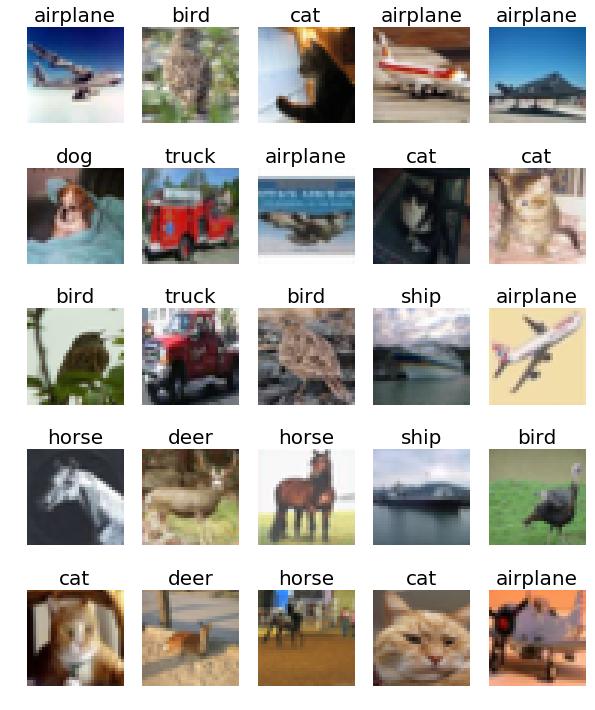

In [3]:
import random

# series to 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def preLoad(entry):
    data_dict = unpickle(entry)
    batch_label = data_dict[b'batch_label']
    data = data_dict[b'data']
    labels = data_dict[b'labels']
    filenames = data_dict[b'filenames']
    return data, labels

def preProcess(path_entry, num_classes = 10):
    data = []
    labels = []
    for entry in path_entry:
        temp_data, temp_labels = preLoad(entry)
        data.append(temp_data)
        labels.append(temp_labels)

    data = np.array(data)/255.0
    X = data.reshape(data.shape[0]*data.shape[1], 32, 32, 3)
    print("X.shape = ", X.shape)

    labels = np.array(labels)
    Y = labels.reshape(labels.shape[0]*labels.shape[1], 1)

    return X, Y, data, labels

def getClassnames(names_entry):
    # Label: retrive classnames from the label
    with open(names_entry, 'rb') as file:
        names = pickle.load(file, encoding='bytes')
    label_names = names[b'label_names']
    return label_names

def showFig(ROWS, COLUMNS, Xorg, Y, names_entry):
    # randomly sample
    indexList = random.sample([idx for idx in range(len(Y))], ROWS*COLUMNS)
    label_names = getClassnames(names_entry)
    
    # Image: show figures with their classnames on top
    fig, ax = plt.subplots(ROWS, COLUMNS, figsize=(COLUMNS*2,ROWS*2.5))
    for index in range(ROWS*COLUMNS):
        image = Xorg[indexList[index], :]
        colorR, colorG, colorB = [image[:1024].reshape(32, 32), image[1024:2048].reshape(32, 32), image[2048:].reshape(32, 32)]
        image = np.zeros(shape = (32, 32, 3))
        image = np.dstack((colorR,colorG,colorB))
        ax[int(index/COLUMNS),  int(index%COLUMNS)].imshow(image)
        ax[int(index/COLUMNS),  int(index%COLUMNS)].set_title(label_names[int(Y[indexList[index]])].decode("utf-8"), fontsize = 20)
        ax[int(index/COLUMNS),  int(index%COLUMNS)].axis('off')
    
names_entry = cwd  + "/cifar-10-batches-py/batches.meta"
classnames = getClassnames(names_entry)
number_classes = len(classnames)
print("number_classes = ", number_classes)

X, Y, data, labels = preProcess(train_path_entry)
test_X, test_Y, test_data, test_labels = preProcess(test_path_entry)

Xorg = X.reshape(X.shape[0], -1)
showFig(5, 5, Xorg, Y, names_entry)


In [4]:
# X, Y = preProcess(train_path_entry)
print("X.shape = ", X.shape)
print("Y.shape = ", Y.shape)

X.shape =  (50000, 32, 32, 3)
Y.shape =  (50000, 1)


In [5]:

def convNet_model():
    # creat model 
    model = Sequential()
    model.add(Conv2D(192, (5, 5), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    model.add(Conv2D(96, (5, 5), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(3072, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))

    model.add(Dense(10,  kernel_initializer = 'normal', activation = 'softmax'))
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#     opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

def plot_history(history):
    accuracy = history.history['acc']
    loss = history.history['loss']
    fig, ax = plt.subplots(1, 2, figsize = (10, 5))
    fontSize = 32
    ax[0].plot(accuracy, color = 'C0', marker = 's')
    ax[0].set_xlabel('epoch (#)', fontsize = fontSize)
    ax[0].set_ylabel('accuracy', fontsize = fontSize)
    ax[0].set_title('accuracy', fontsize = fontSize)
    ax[0].set_xlim([0, 10])
    ax[0].set_ylim([0, 1.0])
    ax[1].plot(loss, color = 'C1', marker = 'o')
    ax[1].set_xlabel('loss', fontsize = fontSize)
    ax[1].set_title('loss' , fontsize = fontSize)
    ax[1].set_xlim([0, 10])
    ax[1].set_ylim([0, 2.0])
    plt.show()

Epoch 1/10
50000/50000 [==============================] - 34s 688us/step - loss: 1.5883 - acc: 0.4713
Epoch 2/10
50000/50000 [==============================] - 33s 670us/step - loss: 1.1705 - acc: 0.5918
Epoch 3/10
50000/50000 [==============================] - 34s 671us/step - loss: 1.0152 - acc: 0.6483
Epoch 4/10
50000/50000 [==============================] - 33s 669us/step - loss: 0.9079 - acc: 0.6868
Epoch 5/10
50000/50000 [==============================] - 33s 663us/step - loss: 0.7959 - acc: 0.7253
Epoch 6/10
50000/50000 [==============================] - 33s 662us/step - loss: 0.7001 - acc: 0.7604
Epoch 7/10
50000/50000 [==============================] - 33s 663us/step - loss: 0.6034 - acc: 0.7936
Epoch 8/10
50000/50000 [==============================] - 33s 664us/step - loss: 0.5230 - acc: 0.8239
Epoch 9/10
50000/50000 [==============================] - 33s 669us/step - loss: 0.4410 - acc: 0.8515
Epoch 10/10
50000/50000 [==============================] - 33s 669us/step - loss: 

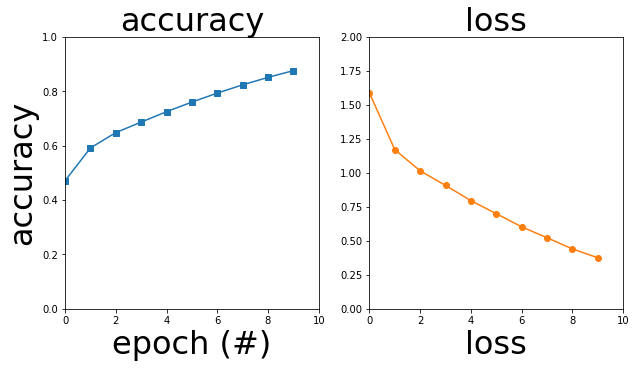

10000/10000 [==============================] - 2s 192us/step
test_loss =  1.1365633152961732
test_acc =  0.6719


In [6]:
# sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
cifar_model = convNet_model()
history_batch = cifar_model.fit(X, Y, epochs = 10, batch_size = 100)
plot_history(history_batch)

test_loss, test_acc = cifar_model.evaluate(test_X, test_Y)
print('test_loss = ', test_loss)
print('test_acc = ', test_acc)

In [9]:

def convNet_model():
    # creat model 
    model = Sequential()
    model.add(Conv2D(192, (5, 5), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(96, (5, 5), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(3072, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10,  kernel_initializer = 'normal', activation = 'softmax'))
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#     opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model


Epoch 1/10
50000/50000 [==============================] - 397s 8ms/step - loss: 1.9931 - acc: 0.3627
Epoch 2/10
50000/50000 [==============================] - 396s 8ms/step - loss: 1.3586 - acc: 0.5166
Epoch 3/10
50000/50000 [==============================] - 396s 8ms/step - loss: 1.2045 - acc: 0.5750
Epoch 4/10
50000/50000 [==============================] - 396s 8ms/step - loss: 1.0933 - acc: 0.6148
Epoch 5/10
50000/50000 [==============================] - 395s 8ms/step - loss: 1.0097 - acc: 0.6449
Epoch 6/10
50000/50000 [==============================] - 396s 8ms/step - loss: 0.9295 - acc: 0.6703
Epoch 7/10
50000/50000 [==============================] - 396s 8ms/step - loss: 0.8532 - acc: 0.6977
Epoch 8/10
50000/50000 [==============================] - 395s 8ms/step - loss: 0.7920 - acc: 0.7208
Epoch 9/10
50000/50000 [==============================] - 395s 8ms/step - loss: 0.7270 - acc: 0.7423
Epoch 10/10
50000/50000 [==============================] - 828s 17ms/step - loss: 0.6519 - 

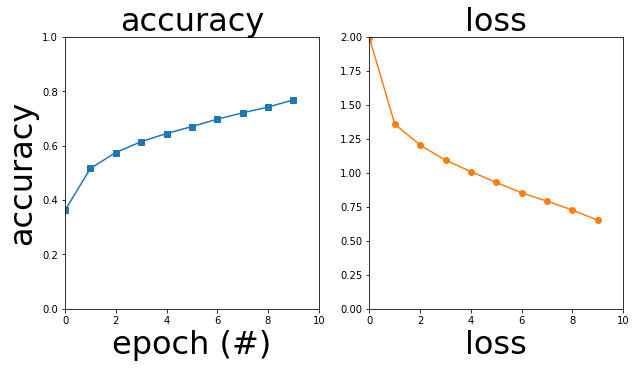

10000/10000 [==============================] - 28s 3ms/step
test_loss =  1.09168361120224
test_acc =  0.6493


In [10]:
# sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
cifar_model = convNet_model()
history_batch = cifar_model.fit(X, Y, epochs = 10, batch_size = 100)
plot_history(history_batch)

test_loss, test_acc = cifar_model.evaluate(test_X, test_Y)
print('test_loss = ', test_loss)
print('test_acc = ', test_acc)

Epoch 1/10
50000/50000 [==============================] - 173s 3ms/step - loss: 1.5665 - acc: 0.4405
Epoch 2/10
50000/50000 [==============================] - 145s 3ms/step - loss: 1.2377 - acc: 0.5612
Epoch 3/10
50000/50000 [==============================] - 212s 4ms/step - loss: 1.0940 - acc: 0.6148
Epoch 4/10
50000/50000 [==============================] - 104s 2ms/step - loss: 0.9978 - acc: 0.6490
Epoch 5/10
50000/50000 [==============================] - 241s 5ms/step - loss: 0.8957 - acc: 0.6823
Epoch 6/10
50000/50000 [==============================] - 100s 2ms/step - loss: 0.8026 - acc: 0.7167
Epoch 7/10
50000/50000 [==============================] - 216s 4ms/step - loss: 0.7214 - acc: 0.7433
Epoch 8/10
50000/50000 [==============================] - 142s 3ms/step - loss: 0.6336 - acc: 0.7755
Epoch 9/10
50000/50000 [==============================] - 174s 3ms/step - loss: 0.5591 - acc: 0.8010
Epoch 10/10
50000/50000 [==============================] - 184s 4ms/step - loss: 0.4806 - a

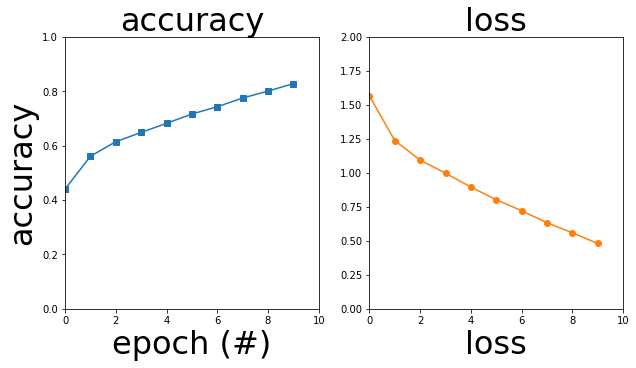

10000/10000 [==============================] - 21s 2ms/step
test_loss =  1.1085376190185547
test_acc =  0.6851


In [11]:
def convNet_model():
    # creat model 
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(3072, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10,  kernel_initializer = 'normal', activation = 'softmax'))
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#     opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
cifar_model = convNet_model()
history_batch = cifar_model.fit(X, Y, epochs = 10, batch_size = 100)
plot_history(history_batch)

test_loss, test_acc = cifar_model.evaluate(test_X, test_Y)
print('test_loss = ', test_loss)
print('test_acc = ', test_acc)

Epoch 1/10
50000/50000 [==============================] - 84s 2ms/step - loss: 1.6286 - acc: 0.4127
Epoch 2/10
50000/50000 [==============================] - 50s 1ms/step - loss: 1.3277 - acc: 0.5280
Epoch 3/10
50000/50000 [==============================] - 149s 3ms/step - loss: 1.2123 - acc: 0.5691
Epoch 4/10
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1265 - acc: 0.5983
Epoch 5/10
50000/50000 [==============================] - 44s 889us/step - loss: 1.0505 - acc: 0.6283
Epoch 6/10
50000/50000 [==============================] - 140s 3ms/step - loss: 0.9833 - acc: 0.6518
Epoch 7/10
50000/50000 [==============================] - 110s 2ms/step - loss: 0.9147 - acc: 0.6732
Epoch 8/10
50000/50000 [==============================] - 44s 875us/step - loss: 0.8516 - acc: 0.6953
Epoch 9/10
50000/50000 [==============================] - 126s 3ms/step - loss: 0.7940 - acc: 0.7165
Epoch 10/10
50000/50000 [==============================] - 124s 2ms/step - loss: 0.7267 - ac

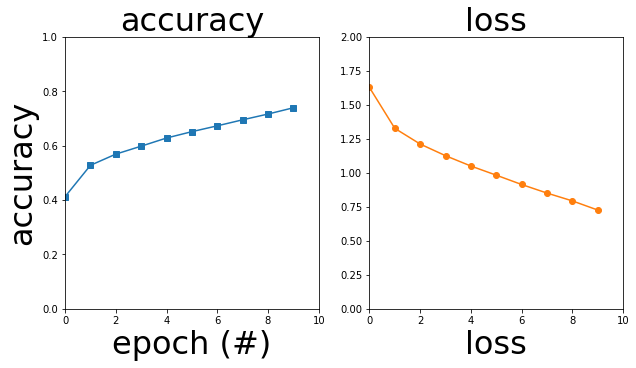

10000/10000 [==============================] - 3s 312us/step
test_loss =  1.078640937423706
test_acc =  0.6402


In [12]:
def convNet_model():
    # creat model 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(3072, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10,  kernel_initializer = 'normal', activation = 'softmax'))
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#     opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
cifar_model = convNet_model()
history_batch = cifar_model.fit(X, Y, epochs = 10, batch_size = 100)
plot_history(history_batch)

test_loss, test_acc = cifar_model.evaluate(test_X, test_Y)
print('test_loss = ', test_loss)
print('test_acc = ', test_acc)

Epoch 1/10
50000/50000 [==============================] - 32s 631us/step - loss: 1.7049 - acc: 0.3852
Epoch 2/10
50000/50000 [==============================] - 34s 679us/step - loss: 1.4519 - acc: 0.4813
Epoch 3/10
50000/50000 [==============================] - 102s 2ms/step - loss: 1.3551 - acc: 0.5165
Epoch 4/10
50000/50000 [==============================] - 103s 2ms/step - loss: 1.2838 - acc: 0.5412 4s - los
Epoch 5/10
50000/50000 [==============================] - 40s 808us/step - loss: 1.2286 - acc: 0.5619
Epoch 6/10
50000/50000 [==============================] - 31s 613us/step - loss: 1.1710 - acc: 0.5825
Epoch 7/10
50000/50000 [==============================] - 57s 1ms/step - loss: 1.1253 - acc: 0.5994
Epoch 8/10
50000/50000 [==============================] - 101s 2ms/step - loss: 1.0832 - acc: 0.6146
Epoch 9/10
50000/50000 [==============================] - 90s 2ms/step - loss: 1.0287 - acc: 0.6315
Epoch 10/10
50000/50000 [==============================] - 30s 610us/step - loss

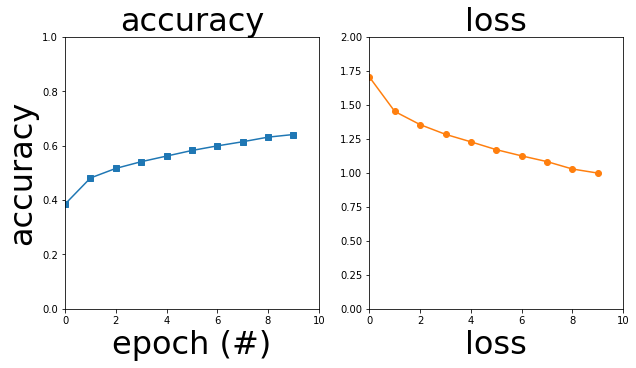

10000/10000 [==============================] - 2s 227us/step
test_loss =  1.1106658622741699
test_acc =  0.6159


In [13]:
def convNet_model():
    # creat model 
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(3072, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10,  kernel_initializer = 'normal', activation = 'softmax'))
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#     opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
cifar_model = convNet_model()
history_batch = cifar_model.fit(X, Y, epochs = 10, batch_size = 100)
plot_history(history_batch)

test_loss, test_acc = cifar_model.evaluate(test_X, test_Y)
print('test_loss = ', test_loss)
print('test_acc = ', test_acc)

Epoch 1/10
50000/50000 [==============================] - 28s 552us/step - loss: 1.6676 - acc: 0.3996
Epoch 2/10
50000/50000 [==============================] - 70s 1ms/step - loss: 1.4420 - acc: 0.4823
Epoch 3/10
50000/50000 [==============================] - 91s 2ms/step - loss: 1.3534 - acc: 0.5174
Epoch 4/10
50000/50000 [==============================] - 78s 2ms/step - loss: 1.2837 - acc: 0.5440
Epoch 5/10
50000/50000 [==============================] - 26s 524us/step - loss: 1.2288 - acc: 0.5614
Epoch 6/10
50000/50000 [==============================] - 26s 524us/step - loss: 1.1877 - acc: 0.5757
Epoch 7/10
50000/50000 [==============================] - 48s 958us/step - loss: 1.1362 - acc: 0.59662s -
Epoch 8/10
50000/50000 [==============================] - 92s 2ms/step - loss: 1.0995 - acc: 0.6105
Epoch 9/10
50000/50000 [==============================] - 92s 2ms/step - loss: 1.0524 - acc: 0.6229
Epoch 10/10
50000/50000 [==============================] - 34s 679us/step - loss: 1.0133

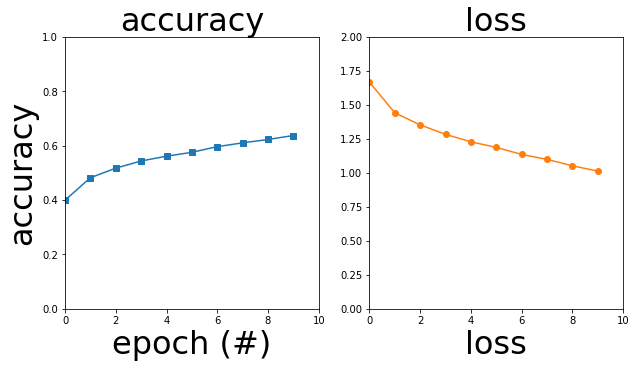

10000/10000 [==============================] - 2s 200us/step
test_loss =  1.1401195013999939
test_acc =  0.6


In [14]:
def convNet_model():
    # creat model 
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(3072, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10,  kernel_initializer = 'normal', activation = 'softmax'))
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#     opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
cifar_model = convNet_model()
history_batch = cifar_model.fit(X, Y, epochs = 10, batch_size = 100)
plot_history(history_batch)

test_loss, test_acc = cifar_model.evaluate(test_X, test_Y)
print('test_loss = ', test_loss)
print('test_acc = ', test_acc)

Epoch 1/10
50000/50000 [==============================] - 25s 503us/step - loss: 1.7248 - acc: 0.3752
Epoch 2/10
50000/50000 [==============================] - 26s 525us/step - loss: 1.4713 - acc: 0.4746
Epoch 3/10
50000/50000 [==============================] - 82s 2ms/step - loss: 1.3691 - acc: 0.5106
Epoch 4/10
50000/50000 [==============================] - 84s 2ms/step - loss: 1.3069 - acc: 0.5337
Epoch 5/10
50000/50000 [==============================] - 64s 1ms/step - loss: 1.2522 - acc: 0.5541
Epoch 6/10
50000/50000 [==============================] - 24s 476us/step - loss: 1.2126 - acc: 0.5691
Epoch 7/10
50000/50000 [==============================] - 24s 482us/step - loss: 1.1737 - acc: 0.5804
Epoch 8/10
50000/50000 [==============================] - 34s 688us/step - loss: 1.1434 - acc: 0.5910
Epoch 9/10
50000/50000 [==============================] - 84s 2ms/step - loss: 1.1070 - acc: 0.6062
Epoch 10/10
50000/50000 [==============================] - 84s 2ms/step - loss: 1.0719 - a

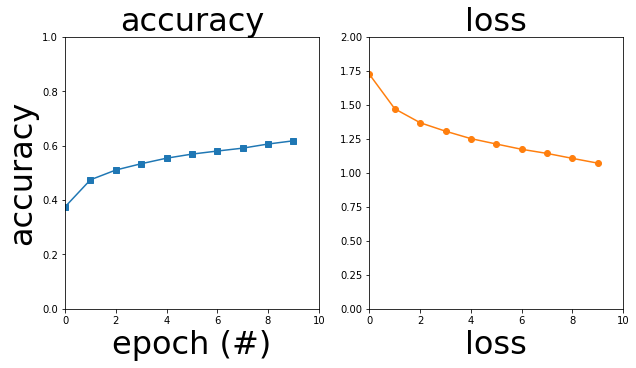

10000/10000 [==============================] - 8s 795us/step
test_loss =  1.1457532997131348
test_acc =  0.5957


In [15]:
def convNet_model():
    # creat model 
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(3072, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10,  kernel_initializer = 'normal', activation = 'softmax'))
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#     opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
cifar_model = convNet_model()
history_batch = cifar_model.fit(X, Y, epochs = 10, batch_size = 100)
plot_history(history_batch)

test_loss, test_acc = cifar_model.evaluate(test_X, test_Y)
print('test_loss = ', test_loss)
print('test_acc = ', test_acc)

Epoch 1/10
50000/50000 [==============================] - 46s 916us/step - loss: 1.7084 - acc: 0.3772
Epoch 2/10
50000/50000 [==============================] - 23s 462us/step - loss: 1.4782 - acc: 0.4730
Epoch 3/10
50000/50000 [==============================] - 23s 462us/step - loss: 1.3879 - acc: 0.5031
Epoch 4/10
50000/50000 [==============================] - 44s 878us/step - loss: 1.3239 - acc: 0.5266
Epoch 5/10
50000/50000 [==============================] - 79s 2ms/step - loss: 1.2733 - acc: 0.5469
Epoch 6/10
50000/50000 [==============================] - 79s 2ms/step - loss: 1.2284 - acc: 0.5618
Epoch 7/10
50000/50000 [==============================] - 49s 978us/step - loss: 1.1846 - acc: 0.5796
Epoch 8/10
50000/50000 [==============================] - 23s 458us/step - loss: 1.1461 - acc: 0.5925
Epoch 9/10
50000/50000 [==============================] - 23s 456us/step - loss: 1.1125 - acc: 0.6036
Epoch 10/10
50000/50000 [==============================] - 37s 739us/step - loss: 1.07

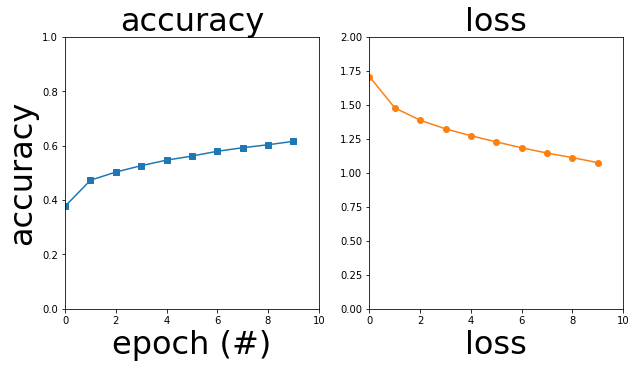

10000/10000 [==============================] - 8s 755us/step
test_loss =  1.1565702967643738
test_acc =  0.59


In [16]:
def convNet_model():
    # creat model 
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(3072, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10,  kernel_initializer = 'normal', activation = 'softmax'))
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#     opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
cifar_model = convNet_model()
history_batch = cifar_model.fit(X, Y, epochs = 10, batch_size = 100)
plot_history(history_batch)

test_loss, test_acc = cifar_model.evaluate(test_X, test_Y)
print('test_loss = ', test_loss)
print('test_acc = ', test_acc)